In [9]:
import cv2  #importing OpenCV library
import matplotlib.pyplot as plt

In [10]:
config_file= "C:\\Users\\ACER\Downloads\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "C:\\Users\\ACER\\Downloads\\frozen_inference_graph.pb"

In [11]:
model =cv2.dnn_DetectionModel(frozen_model, config_file)

In [23]:
classLabels=[]
file_name= "C:\\Users\\ACER\\Downloads\\labels.txt"
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [19]:
print(classLabels)          #80 categories in COCO dataset

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [20]:
print(len(classLabels))     #length of COCO dataset

80


In [26]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5)) #
model.setInputSwapRB(True)

< cv2.dnn.Model 000002C7731A2150>

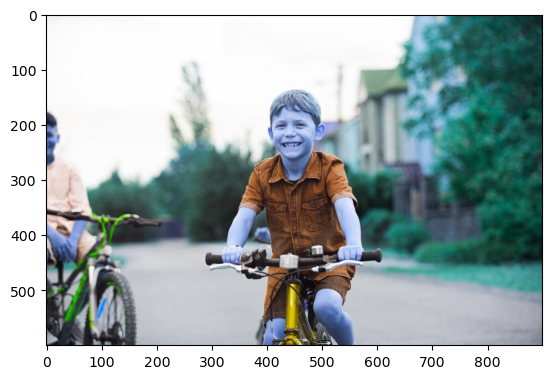

In [35]:
img =cv2.imread("C:\\Users\\ACER\\Downloads\\boy.jpg")
plt.imshow(img)

In [34]:
ClassIndex, confidence, bbox = model.detect(img , confThreshold=0.5)

In [36]:
print(ClassIndex)

[1 2 2 1]


In [43]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten() ,confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0]+10 , boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness= 3)

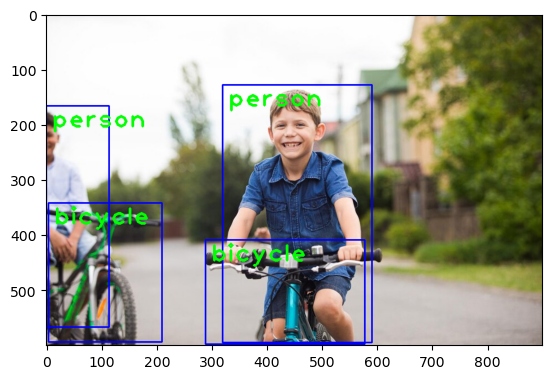

In [44]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [48]:
import cv2

# Load the model
config_file= "C:\\Users\\ACER\Downloads\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "C:\\Users\\ACER\\Downloads\\frozen_inference_graph.pb"
model = cv2.dnn_DetectionModel(frozen_model, config_file)
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

# For Video
cap = cv2.VideoCapture("C:\\Users\\ACER\\Downloads\\17476835-hd_1920_1080_30fps.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Can't receive frame (stream end?). Exiting ...")
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (20, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (box[0] + 10, box[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
                
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[ 1 17]
[17]
[17]
[1]
[1]
[17  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 63]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 63]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[77]
[77]
[77]
[ 1 77]
[ 1 77]
[77]
[77]
[77 77]
[77]
[77]
[77]
[77 77]
[77 77]
[77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77 77]
[77 77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77]
[77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77 77]
[77 77 77]
[77 77]
[77]
[77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77 77]
[77 77]
[77 77]
[77]
[77]
[77]
[77]
[77]
[77]
[77 77]
[77 77]
[77 77]
[77]
[77 77]
[77]
[77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77 77]
[77 77 77]
[77 77]
[77 77  1]
[77 77  1]
[77 77  1]
[77]
[77 77  1]
[77 77  1]
[77]
[77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[

In [45]:
# sourcelink for project - https://youtu.be/luWCJ2pWmhM?si=R7AB9Xd03JBWkbxh

In [ ]:
# explanation is available - https://chatgpt.com/share/6a6b5da1-b51d-4469-82be-6adec186a1a4